# 0. Welcome <a name="Welcome"></a>

- $Candidate Number:$ 250945
- $Date:$    Spring 2021

In this notebook, we are going to be looking at the fairness library AIF360 for the 934G5: Machine Learning Coursework.

Moreover, the Submit_ML_Coursework_Final_Part2 demostrates techniques and scenarios which supplement what was learned during the ML course. These include :
- Fairness methods beyond binary sensitive features and in processing algorithms such as AdversarialDebiasing
- when sensitive attribute is a feature of the main input X and when
we exclude it from the features of X





In [1]:
!pip install 'aif360[LFR]'

     |████████████████████████████████| 175 kB 5.1 MB/s 
     |████████████████████████████████| 564 kB 59.4 MB/s 
  Created wheel for memory-profiler: filename=memory_profiler-0.60.0-py3-none-any.whl size=31284 sha256=a105d90d70ac7161a57fac5c08fc52f0c81a970a3716cf6755e587bae39af9da
  Stored in directory: /root/.cache/pip/wheels/67/2b/fb/326e30d638c538e69a5eb0aa47f4223d979f502bbdb403950f
Successfully built memory-profiler


In [2]:
cd /usr/local/lib/python3.7/dist-packages/aif360/data/raw/adult

/usr/local/lib/python3.7/dist-packages/aif360/data/raw/adult


In [3]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test

--2022-05-13 13:20:02--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974305 (3.8M) [application/x-httpd-php]
Saving to: ‘adult.data’

adult.data          100%[===================>]   3.79M  7.23MB/s    in 0.5s    

2022-05-13 13:20:03 (7.23 MB/s) - ‘adult.data’ saved [3974305/3974305]

--2022-05-13 13:20:03--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5229 (5.1K) [application/x-httpd-php]
Saving to: ‘adult.names’

adult.names         100%[===================>]   5.11K  --.-KB/s    in 0s      

2022-

In [4]:
cd /usr/local/lib/python3.7/dist-packages/aif360/data/raw/german

/usr/local/lib/python3.7/dist-packages/aif360/data/raw/german


In [5]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.doc

--2022-05-13 13:20:04--  https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79793 (78K) [application/x-httpd-php]
Saving to: ‘german.data’

german.data         100%[===================>]  77.92K  --.-KB/s    in 0.1s    

2022-05-13 13:20:05 (598 KB/s) - ‘german.data’ saved [79793/79793]

--2022-05-13 13:20:05--  https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.doc
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4679 (4.6K) [application/x-httpd-php]
Saving to: ‘german.doc’

german.doc          100%[===================>]   4.57K  --.-KB/s    in 0s  

In [6]:
! pip install "fairlearn"
!pip install BlackBoxAuditing

     |████████████████████████████████| 177 kB 5.0 MB/s 
     |████████████████████████████████| 2.6 MB 5.1 MB/s 
  Created wheel for BlackBoxAuditing: filename=BlackBoxAuditing-0.1.54-py2.py3-none-any.whl size=1394770 sha256=e7da330fea2f50ad54a0257426b14efe0f91778a9f6a263af4f84eead8f4f0ef
  Stored in directory: /root/.cache/pip/wheels/05/9f/ee/541a74be4cf5dad17430e64d3276370ea7b6a834a76cb4215a
Successfully built BlackBoxAuditing


In [7]:
#Baseline code adapted from sections of V Sharmanska. 
#STEP 1: Import the necessary libraries for this notebook

# Libraries to study in aif360
from aif360.datasets import AdultDataset, GermanDataset, BankDataset
from aif360.algorithms.preprocessing.optim_preproc_helpers.data_preproc_functions import load_preproc_data_adult,load_preproc_data_german
from aif360.algorithms.preprocessing import DisparateImpactRemover,LFR
from aif360.sklearn.datasets import fetch_adult,fetch_german
from aif360.sklearn.metrics import disparate_impact_ratio, average_odds_error, generalized_fpr,equal_opportunity_difference,statistical_parity_difference
from aif360.sklearn.preprocessing import ReweighingMeta,Reweighing
from aif360.sklearn.inprocessing import AdversarialDebiasing,ExponentiatedGradientReduction
from aif360.sklearn.postprocessing import CalibratedEqualizedOdds

# Sklearn imports
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import *
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, auc

# ML libraries
import numpy as np
import pickle
import pdb
import torch
import tensorflow as tf
import time
from torch import optim
from sklearn.model_selection import KFold
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
from torch import nn
from torch.nn import functional as F
from typing import Callable
import pandas as pd
import matplotlib.pyplot as plt

# Graphs libraries
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-white')
import seaborn as sns

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from plotly import tools
from pprint import pprint

# Design libraries
from IPython.display import Markdown, display
import warnings
warnings.filterwarnings("ignore")

np.random.seed(0)

## Part1: Beyond binary sensitive features

In order to work with non binary sensitve features we need to reindex the number of columns we want to use. The baseline index which are normaly used in the binary cases are sex and race, which can be male and female or white and non whites (which encompass black, hispanic, asian, etc). For this reason when using non binary features such as occupation and relationship (as seen on the table bellow) one needs to pre process the features with reweigh.

The drawback of using non sensitive features are the avaliable fairness metrics. Majority of the avaliable metrics mostly account for binary classifition. Altough there are some applications of group bias count examples avaliable. 




### 1.1 Multiclass sensitive feature relationship

In [8]:
X, y, sample_weight = fetch_adult()#for this dataset the protected variables are race and sex
X.head()

,,,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
,race,sex,,,,,,,,,,,,,
0,Non-white,Male,25.0,Private,11th,7.0,Never-married,Machine-op-inspct,Own-child,Non-white,Male,0.0,0.0,40.0,United-States
1,White,Male,38.0,Private,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States
2,White,Male,28.0,Local-gov,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States
3,Non-white,Male,44.0,Private,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Non-white,Male,7688.0,0.0,40.0,United-States
5,White,Male,34.0,Private,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States


In [9]:
#reference: https://github.com/Trusted-AI/AIF360/blob/master/examples/sklearn/demo_new_features.ipynb and stackoverflow
#adult dataset
y = y.to_frame()#transforming the target variables from series to dataframe 
values = X['relationship'].tolist()
y['relationship'] = values# adding the new non binary sensitive features
y = y.set_index('relationship',append=True)#re indexing the target variable table with non binary sensitive features
y = y.squeeze()#tranforming the dataframe back to series 
X = X.set_index('relationship',append=True).copy()#reindexing the main input with non binary sensitive features
X['relationship'] = values
X['relationship'] = X['relationship'].astype('category')#make sure this table is category to be used during encoding 
X.index = pd.MultiIndex.from_arrays(X.index.codes, names=X.index.names)
y.index = pd.MultiIndex.from_arrays(y.index.codes, names=y.index.names)
y = pd.Series(y.factorize(sort=True)[0], index=y.index)
y.head()

   race  sex  relationship
0  0     1    3               0
1  1     1    0               0
2  1     1    0               1
3  0     1    0               1
4  1     1    1               0
dtype: int64

In [10]:
#german dataset
X_, y_ = fetch_german()#on the other hand this dataset has sex,age and foreign_worker as protected features
X_.index = pd.MultiIndex.from_arrays(X_.index.codes, names=X_.index.names)
y_.index = pd.MultiIndex.from_arrays(y_.index.codes, names=y_.index.names)
y_ = pd.Series(y_.factorize(sort=True)[0], index=y_.index)
y_.head()

   sex  age  foreign_worker
0  1    1    1                 1
1  0    0    1                 0
2  1    1    1                 1
3  1    1    1                 1
4  1    1    1                 0
dtype: int64

In [11]:
#adult dataset
y_ = y_.to_frame()#transforming the target variables from series to dataframe 
values = X_['job'].tolist()
y_['job'] = values# adding the new non binary sensitive features
y_ = y_.set_index('job',append=True)#re indexing the target variable table with non binary sensitive features
y_ = y_.squeeze()#tranforming the dataframe back to series 
X_ = X_.set_index('job',append=True).copy()#reindexing the main input with non binary sensitive features
X_['job'] = values
X_['job'] = X_['job'].astype('category')#make sure this table is category to be used during encoding 
X_.index = pd.MultiIndex.from_arrays(X_.index.codes, names=X_.index.names)
y_.index = pd.MultiIndex.from_arrays(y_.index.codes, names=y_.index.names)
y_ = pd.Series(y_.factorize(sort=True)[0], index=y_.index)
y_.head()

   sex  age  foreign_worker  job
0  1    1    1               1      1
1  0    0    1               1      0
2  1    1    1               3      1
3  1    1    1               1      1
4  1    1    1               1      0
dtype: int64

In [ ]:
start = time.time()#this is to measure elapsed time

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
#tf.enable_eager_execution()
tf.disable_eager_execution()

kf = KFold(n_splits=5, random_state=41, shuffle=True)
results_ = {}

criterions = [0.00001,0.001,1,100,10000]

for criterion in criterions:
  #print("TRAIN:", train_index, "TEST:", test_index)
  print('\n Welcome to Criterion number {} \n'.format(criterion))
  
  #Step 1: get the criterion
  for fold_num,(train_index, test_index) in enumerate(kf.split(X,y)):
    
    #Step 2: get the train and test fold subsets from the dataset
    X_train_fold, X_test_fold = X.loc[train_index], X.loc[test_index]
    y_train_fold, y_test_fold = y.loc[train_index], y.loc[test_index]

    #Step 3: one hot encode the variables before fitting on the model
    ohe = make_column_transformer(
          (OneHotEncoder(sparse=False,handle_unknown='ignore'), X_train_fold.dtypes == 'category'),
          remainder='passthrough')
    X_train_fold  = pd.DataFrame(ohe.fit_transform(X_train_fold), index=X_train_fold.index)
    X_test_fold = pd.DataFrame(ohe.transform(X_test_fold), index=X_test_fold.index)

    #Step 4: run the adversarial debiasing classifier
    learner = AdversarialDebiasing(prot_attr='relationship', random_state=1234567,adversary_loss_weight=criterion)
    learner.fit(X_train_fold,y_train_fold)
    predictions = learner.predict(X_test_fold)

    model_acc = sum(predictions==y_test_fold)/len(y_test_fold)
    test_pred = y.loc[test_index].copy()
    test_pred = predictions
    #Step 5: retrieve the metrics
    metric_dis = disparate_impact_ratio(y_test_fold, learner.predict(X_test_fold), prot_attr='relationship')
    metric_eqq = equal_opportunity_difference(y_test_fold, learner.predict(X_test_fold), prot_attr='relationship')
    metric_stat = statistical_parity_difference(y_test_fold, learner.predict(X_test_fold), prot_attr='relationship')
    #retrieving metrics from the classifier. The accuracies include percentage of true pred, statistical parity difference, disparate impact and equal opportunity.
    result = {'Accuracy':model_acc,'statistical_parity_difference': metric_stat,'disparate_impact': metric_dis,'equal_opportunity_difference': metric_eqq}

    results_[str(fold_num)+'AdversarialDebiasing_'+str(criterion)]=result#saving the results of the decision tree classifier 

results_occupation_add = results_.copy()
end = time.time()
total = end - start
print('Total elapsed time was',total)



Instructions for updating:
non-resource variables are not supported in the long term

 Welcome to Fold number 0 


 Welcome to Fold number 1 


 Welcome to Fold number 2 


 Welcome to Fold number 3 


 Welcome to Fold number 4 

Total elapsed time was 915.2160284519196


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! ls '/content/drive/MyDrive/UniSussex/ML'

Submit_ML_Coursework_Final_Part2_final.ipynb
Submit_ML_Coursework_Final_Part2.ipynb


In [ ]:
import pickle
#save results to google drive
with open('/content/drive/MyDrive/UniSussex/ML/AdversarialDebiasing_relationshipfeature_.pickle', 'wb') as f:
    pickle.dump(results_occupation_add, f)

In [ ]:
start = time.time()#this is to measure elapsed time

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
#tf.enable_eager_execution()
tf.disable_eager_execution()

kf = KFold(n_splits=5, random_state=41, shuffle=True)
results_ = {}

criterions = [0.00001,0.001,1,100,10000]

for criterion in criterions:
  #Step 1: get the criterion for this particular run
  #print("TRAIN:", train_index, "TEST:", test_index)
  print('\n Welcome to Criterion number {} \n'.format(criterion))

  for fold_num,(train_index, test_index) in enumerate(kf.split(X_,y_)):
    #Step 2: get the train and test fold subsets from the dataset
    X_train_fold, X_test_fold = X_.loc[train_index], X_.loc[test_index]
    y_train_fold, y_test_fold = y_.loc[train_index], y_.loc[test_index]
    #Step 3: one hot encode the variables before fitting on the model
    ohe = make_column_transformer(
          (OneHotEncoder(sparse=False,handle_unknown='ignore'), X_train_fold.dtypes == 'category'),
          remainder='passthrough')
    X_train_fold  = pd.DataFrame(ohe.fit_transform(X_train_fold), index=X_train_fold.index)
    X_test_fold = pd.DataFrame(ohe.transform(X_test_fold), index=X_test_fold.index)
    #Step 4: run the adversarial debiasing classifier
    learner = AdversarialDebiasing(prot_attr='job', random_state=1234567,adversary_loss_weight=criterion)
    learner.fit(X_train_fold,y_train_fold)
    predictions = learner.predict(X_test_fold)

    model_acc = sum(predictions==y_test_fold)/len(y_test_fold)
    test_pred = y.loc[test_index].copy()
    test_pred = predictions
    #Step 5: retrieve the metrics
    metric_dis = disparate_impact_ratio(y_test_fold, learner.predict(X_test_fold), prot_attr='job')
    metric_eqq = equal_opportunity_difference(y_test_fold, learner.predict(X_test_fold), prot_attr='job')
    metric_stat = statistical_parity_difference(y_test_fold, learner.predict(X_test_fold), prot_attr='job')
    #retrieving metrics from the classifier. The accuracies include percentage of true pred, statistical parity difference, disparate impact and equal opportunity.
    result = {'Accuracy':model_acc,'statistical_parity_difference': metric_stat,'disparate_impact': metric_dis,'equal_opportunity_difference': metric_eqq}

    results_[str(fold_num)+'AdversarialDebiasing_'+str(criterion)]=result#saving the results of the decision tree classifier 

results_occupation_add = results_.copy()

import pickle
#save results to google drive
with open('/content/drive/MyDrive/UniSussex/ML/AdversarialDebiasing_job_.pickle', 'wb') as f:
    pickle.dump(results_occupation_add, f)
    
end = time.time()
total = end - start
print('Total elapsed time was',total)


 Welcome to Fold number 0 


 Welcome to Fold number 1 


 Welcome to Fold number 2 


 Welcome to Fold number 3 


 Welcome to Fold number 4 

Total elapsed time was 32.36254024505615


### 1.2 Multiclass sensitive after Reweighing

In [ ]:
start = time.time()#this is to measure elapsed time
from aif360.algorithms.inprocessing import AdversarialDebiasing, PrejudiceRemover, GerryFairClassifier
kf = KFold(n_splits=5, random_state=41, shuffle=True)
results_ = {}

# Different criterions
criterions = ['gini', 'entropy']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 100, num = 5)]
max_depth.append(None)

for criterion_1 in criterions:
  #Step 1: get the criterion
  #print("TRAIN:", train_index, "TEST:", test_index)
  print('\n Welcome to Criterion number {} \n'.format(criterion))
  for depth in max_depth:
    for fold_num,(train_index, test_index) in enumerate(kf.split(X,y)):
      #Step 2: get the train and test fold subsets from the dataset
      X_train_fold, X_test_fold = X.loc[train_index], X.loc[test_index]
      y_train_fold, y_test_fold = y.loc[train_index], y.loc[test_index]

      #Step 3: one hot encode the variables before fitting on the model
      ohe = make_column_transformer(
            (OneHotEncoder(sparse=False,handle_unknown='ignore'), X_train_fold.dtypes == 'category'),
            remainder='passthrough')
      X_train_fold  = pd.DataFrame(ohe.fit_transform(X_train_fold), index=X_train_fold.index)
      X_test_fold = pd.DataFrame(ohe.transform(X_test_fold), index=X_test_fold.index)
      
      #STEP 4: Mitigate the bias, e.g. by transforming the original dataset via reweighing.
      RW = Reweighing(prot_attr='relationship')
      #We obtain a set of weights for the training set, to use in scikit-learn.
      trainining_ = RW.fit_transform(X_train_fold,y_train_fold)

      #Step 5: run the decision tree classifier
      learner = DecisionTreeClassifier(criterion=criterion_1,max_depth=depth)  
      learner.fit(X_train_fold,y_train_fold,sample_weight=trainining_[1])
      predictions = learner.predict(X_test_fold)

      model_acc = sum(predictions==y_test_fold)/len(y_test_fold)
      test_pred = y.loc[test_index].copy()
      test_pred = predictions

      #Step 6: retrieve the metrics
      metric_dis = disparate_impact_ratio(y_test_fold, learner.predict(X_test_fold), prot_attr='relationship')
      metric_eqq = equal_opportunity_difference(y_test_fold, learner.predict(X_test_fold), prot_attr='relationship')
      metric_stat = statistical_parity_difference(y_test_fold, learner.predict(X_test_fold), prot_attr='relationship')
      #retrieving metrics from the classifier. The accuracies include percentage of true pred, statistical parity difference, disparate impact and equal opportunity.
      result = {'Accuracy':model_acc,'statistical_parity_difference': metric_stat,'disparate_impact': metric_dis,'equal_opportunity_difference': metric_eqq}

      results_[str(fold_num)+'DecisionTree_'+str(criterion_1)+str(depth)]=result#saving the results of the decision tree classifier 

results_occupation_Tree = results_.copy()
#save results to google drive
with open('/content/drive/MyDrive/UniSussex/ML/DecisionTree_relationshipfeature_weighted_.pickle', 'wb') as f:
    pickle.dump(results_occupation_Tree, f)

end = time.time()
total = end - start
print('Total elapsed time was',total)

Total elapsed time was 17.575918436050415


In [ ]:
#in this run we are using the german dataset were they implemented the foreign_worker as sensitive feature
start = time.time()#this is to measure elapsed time

kf = KFold(n_splits=5, random_state=41, shuffle=True)
results_ = {}

# Different criterions
criterions = ['gini', 'entropy']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 100, num = 5)]
max_depth.append(None)

for criterion_1 in criterions:
  #Step 1: get the criterion
  print('\n Welcome to Criterion number {} \n'.format(criterion))
  for depth in max_depth:

    for fold_num,(train_index, test_index) in enumerate(kf.split(X_,y_)):
      #Step 2: get the train and test fold subsets from the dataset
      X_train_fold, X_test_fold = X_.loc[train_index], X_.loc[test_index]
      y_train_fold, y_test_fold = y_.loc[train_index], y_.loc[test_index]
      #Step 3: one hot encode the variables before fitting on the model
      ohe = make_column_transformer(
            (OneHotEncoder(sparse=False,handle_unknown='ignore'), X_train_fold.dtypes == 'category'),
            remainder='passthrough')
      X_train_fold  = pd.DataFrame(ohe.fit_transform(X_train_fold), index=X_train_fold.index)
      X_test_fold = pd.DataFrame(ohe.transform(X_test_fold), index=X_test_fold.index)
      
      #STEP 4: Mitigate the bias, e.g. by transforming the original dataset via reweighing.
      RW = Reweighing(prot_attr='job')
      #We obtain a set of weights for the training set, to use in scikit-learn.
      trainining_ = RW.fit_transform(X_train_fold,y_train_fold)
      #Step 5: run the decision tree classifier
      learner = DecisionTreeClassifier(criterion=criterion_1,max_depth=depth)  
      learner.fit(X_train_fold,y_train_fold,sample_weight=trainining_[1])
      predictions = learner.predict(X_test_fold)

      model_acc = sum(predictions==y_test_fold)/len(y_test_fold)
      test_pred = y.loc[test_index].copy()
      test_pred = predictions
      #Step 6: retrieve the metrics
      metric_dis = disparate_impact_ratio(y_test_fold, learner.predict(X_test_fold), prot_attr='job')
      metric_eqq = equal_opportunity_difference(y_test_fold, learner.predict(X_test_fold), prot_attr='job')
      metric_stat = statistical_parity_difference(y_test_fold, learner.predict(X_test_fold), prot_attr='job')
      #retrieving metrics from the classifier. The accuracies include percentage of true pred, statistical parity difference, disparate impact and equal opportunity.
      result = {'Accuracy':model_acc,'statistical_parity_difference': metric_stat,'disparate_impact': metric_dis,'equal_opportunity_difference': metric_eqq}

      results_[str(fold_num)+'DecisionTree_'+str(criterion_1)+str(depth)]=result#saving the results of the decision tree classifier 

results_foreign_worker_Tree = results_.copy()
#save results to google drive
with open('/content/drive/MyDrive/UniSussex/ML/DecisionTree_jobfeature_weighted_.pickle', 'wb') as f:
    pickle.dump(results_foreign_worker_Tree, f)
    
end = time.time()
total = end - start
print('Total elapsed time was',total)

Total elapsed time was 1.0466723442077637


## Part 2: Removing sensitive features 


In this section of the report we investigate the effects of removing sensitive features. In order to achive this we only need to read the columns starting from index 2. Thus sex and age or race will be omited.

However, we need to remember that at times proxy variables exist. Thus all the features are important. 



In [ ]:
from aif360.algorithms.postprocessing import CalibratedEqOddsPostprocessing, EqOddsPostprocessing, RejectOptionClassification

In [ ]:
privileged_groups = [{'sex':1,'race': 1}]
unprivileged_groups = [{'sex':0,'race': 0}]
dataset_orig = load_preproc_data_adult(['sex','race'])

#dataset_orig_fix = dataset_orig.convert_to_dataframe()[0].drop(['race', 'sex'], axis=1)
#STEP 3: We split between training and test set.
train_, test_ = dataset_orig.split([0.7], shuffle=True)
print("training data size", train_.features.shape)
print("dataset feature names", train_.feature_names)

kf = KFold(n_splits=5, random_state=41, shuffle=True)
results_ = {}

# Different criterions
criterions = ['gini', 'entropy']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 100, num = 5)]
max_depth.append(None)

for criterion_1 in criterions:
  #Step 1: get the criterion 
  for depth in max_depth:
    for fold_num,(train_index, test_index) in enumerate(kf.split(train_.features)):
      trainining_ = train_.subset(train_index)
      testing_ = train_.subset(test_index)

      #Step 2: Normalize the dataset, both train and test. This should always be done in any machine learning pipeline!
      scale = StandardScaler()

      X_train_ = scale.fit_transform(trainining_.features[:, 2:])#do not read the first two column (sex,race) while fitting to the data
      y_train_ = trainining_.labels.ravel()

      X_test_ = scale.transform(testing_.features[:, 2:]) #do not read the first two column (sex,race) while fitting to the data
      y_test_ = testing_.labels.ravel()

      #Step 3: run the code on the decision tree classifier
      learner = DecisionTreeClassifier(criterion=criterion_1,max_depth=depth)  
      learner.fit(X_train_,y_train_,sample_weight=trainining_.instance_weights)
      predictions = learner.predict(X_test_)
      model_acc = sum(predictions==y_test_)/len(y_test_)

      #Step 4: retrieve the metrics
      test_pred = testing_.copy()
      test_pred.labels = predictions
      metric_pred = ClassificationMetric(testing_, test_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
      classified_metric = ClassificationMetric(testing_, test_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)

      #retrieving metrics from the classifier. The accuracies include percentage of true pred, statistical parity difference, disparate impact and equal opportunity.
      result = {'Accuracy_pre':model_acc,'Accuracy_post':classified_metric.accuracy(),'statistical_parity_difference': metric_pred.statistical_parity_difference(),
            'disparate_impact': metric_pred.disparate_impact(),'equal_opportunity_difference': classified_metric.equal_opportunity_difference()}

      results_[str(fold_num)+'DecisionTree_'+str(criterion_1)+str(depth)]=result#saving the results of the decision tree classifier 

results_Tree_nofeature = results_.copy()
#save results to google drive
with open('/content/drive/MyDrive/UniSussex/ML/DecisionTree_nosensitivefeatureAdult_.pickle', 'wb') as f:
    pickle.dump(results_Tree_nofeature, f)

training data size (34189, 18)
dataset feature names ['race', 'sex', 'Age (decade)=10', 'Age (decade)=20', 'Age (decade)=30', 'Age (decade)=40', 'Age (decade)=50', 'Age (decade)=60', 'Age (decade)=>=70', 'Education Years=6', 'Education Years=7', 'Education Years=8', 'Education Years=9', 'Education Years=10', 'Education Years=11', 'Education Years=12', 'Education Years=<6', 'Education Years=>12']


In [ ]:
privileged_groups = [{'sex':1,'age': 1}]
unprivileged_groups = [{'sex':0,'age': 0}]
dataset_orig = load_preproc_data_german(['sex','age'])

#dataset_orig_fix = dataset_orig.convert_to_dataframe()[0].drop(['race', 'sex'], axis=1)
#STEP 3: We split between training and test set.
train_, test_ = dataset_orig.split([0.7], shuffle=True)
print("training data size", train_.features.shape)
print("dataset feature names", train_.feature_names)

kf = KFold(n_splits=5, random_state=41, shuffle=True)
results_ = {}

# Different criterions
criterions = ['gini', 'entropy']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 100, num = 5)]
max_depth.append(None)

for criterion_1 in criterions:
  #Step 1: retrieve the criterion
  for depth in max_depth:

    for fold_num,(train_index, test_index) in enumerate(kf.split(train_.features)):

      #Step 2: get the train and test fold subsets from the dataset
      trainining_ = train_.subset(train_index)
      testing_ = train_.subset(test_index)

      #Step3: Normalize the dataset, both train and test. This should always be done in any machine learning pipeline!
      scale = StandardScaler()

      X_train_ = scale.fit_transform(trainining_.features[:, 2:])#do not read the first two column (sex,race) while fitting to the data
      y_train_ = trainining_.labels.ravel()

      X_test_ = scale.transform(testing_.features[:, 2:]) #do not read the first two column (sex,race) while fitting to the data
      y_test_ = testing_.labels.ravel()

      #Step 4: run the decision tree classifier
      learner = DecisionTreeClassifier(criterion=criterion_1,max_depth=depth)  
      learner.fit(X_train_,y_train_,sample_weight=trainining_.instance_weights)
      predictions = learner.predict(X_test_)
      model_acc = sum(predictions==y_test_)/len(y_test_)

      test_pred = testing_.copy()
      test_pred.labels = predictions

      #Step 5: apply post processing technique
      CPP = CalibratedEqOddsPostprocessing(privileged_groups = privileged_groups,
                                    unprivileged_groups = unprivileged_groups,
                                    cost_constraint='weighted',
                                    seed=42)
      
      CPP = CPP.fit(testing_, test_pred)
      transf_test_pred = CPP.predict(test_pred)

      #Step 6: retrieve the metrics
      metric_pred = ClassificationMetric(testing_, transf_test_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
      classified_metric = ClassificationMetric(testing_, transf_test_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)

      #retrieving metrics from the classifier. The accuracies include percentage of true pred, statistical parity difference, disparate impact and equal opportunity.
      result = {'Accuracy_pre':model_acc,'Accuracy_post':classified_metric.accuracy(),'statistical_parity_difference': metric_pred.statistical_parity_difference(),
            'disparate_impact': metric_pred.disparate_impact(),'equal_opportunity_difference': classified_metric.equal_opportunity_difference()}

      results_[str(fold_num)+'DecisionTree_'+str(criterion_1)+str(depth)]=result#saving the results of the decision tree classifier 


results_occupation_Tree_nofeature_post = results_.copy()
#save results to google drive
with open('/content/drive/MyDrive/UniSussex/ML/DecisionTree_nosensitivefeature_postprocessingGerman_.pickle', 'wb') as f:
    pickle.dump(results_occupation_Tree_nofeature_post, f)

training data size (700, 11)
dataset feature names ['age', 'sex', 'credit_history=Delay', 'credit_history=None/Paid', 'credit_history=Other', 'savings=500+', 'savings=<500', 'savings=Unknown/None', 'employment=1-4 years', 'employment=4+ years', 'employment=Unemployed']


## Part 3: Extra 

1. Trying to see the effects of having a decision tree with pre and post processing. 

2. two different in processing techniques. Gerry fair and adversarial debiasing. Moreover, the check if different train and test splits have an affect on the classifiers.

In [ ]:
#Welcome to test case 1

privileged_groups = [{'sex':1,'race': 1}]
unprivileged_groups = [{'sex':0,'race': 0}]
dataset_orig = load_preproc_data_adult(['sex','race'])

#dataset_orig_fix = dataset_orig.convert_to_dataframe()[0].drop(['race', 'sex'], axis=1)
#STEP 0: We split between training and test set.
train_, test_ = dataset_orig.split([0.7], shuffle=True)
print("training data size", train_.features.shape)
print("dataset feature names", train_.feature_names)

kf = KFold(n_splits=5, random_state=41, shuffle=True)
results_ = {}

# Different criterions
criterions = ['gini']
max_depth = [100]
repair_level = [0.1,0.3,0.5,0.7,1]

for repair in repair_level:
  #Step 1: get the criterion
  print('\n Welcome to Repair number {} \n'.format(repair))

  for fold_num,(train_index, test_index) in enumerate(kf.split(train_.features)):
    #Step 2: get the train and test fold subsets from the dataset
    trainining_ = train_.subset(train_index)
    testing_ = train_.subset(test_index)

    #Step 3: Normalize the dataset, both train and test. This should always be done in any machine learning pipeline!
    scale = StandardScaler()

    X_train_ = scale.fit_transform(trainining_.features)
    y_train_ = trainining_.labels.ravel()

    X_test_ = scale.transform(testing_.features)
    y_test_ = testing_.labels.ravel()
  
    #STEP 4: Mitigate the bias, e.g. by transforming the original dataset via DisparateImpactRemover.
    di = DisparateImpactRemover(sensitive_attribute='sex',repair_level = repair)
    #We obtain a set of weights for the training set, to use in scikit-learn.
    trainining_weight = di.fit_transform(trainining_)

    #Step 5: Run the decision tree classifier
    learner = DecisionTreeClassifier(criterion='entropy',max_depth=100)  
    learner.fit(X_train_,y_train_,sample_weight=trainining_.instance_weights)
    predictions = learner.predict(X_test_)
    model_acc = sum(predictions==y_test_)/len(y_test_)

    test_pred = testing_.copy()
    test_pred.labels = predictions.reshape(test_pred.labels.shape)

    
    #Step 6: Post process the results from the classifier 
    EOPP = EqOddsPostprocessing(privileged_groups = privileged_groups,
                             unprivileged_groups = unprivileged_groups,
                             seed=42)
    EOPP = EOPP.fit(testing_, test_pred)
    transf_test_pred = EOPP.predict(test_pred)
    
    #Step 7: retrive the metrics
    metric_pred = ClassificationMetric(testing_, transf_test_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
    classified_metric = ClassificationMetric(testing_, transf_test_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
    
    #retrieving metrics from the classifier. The accuracies include percentage of true pred, statistical parity difference, disparate impact and equal opportunity.
    result = {'Accuracy_pre':model_acc,'Accuracy_post':classified_metric.accuracy(),'statistical_parity_difference': metric_pred.statistical_parity_difference(),
              'disparate_impact': metric_pred.disparate_impact(),'equal_opportunity_difference': classified_metric.equal_opportunity_difference()}

    results_[str(fold_num)+'DecisionTree_'+str(repair)]=result#saving the results of the decision tree classifier 

results_occupation_Tree_Extra1 = results_.copy()
with open('/content/drive/MyDrive/UniSussex/ML/results_occupation_Tree_Extra_prepostprocessing.pickle', 'wb') as f:
    pickle.dump(results_occupation_Tree_Extra1, f)

training data size (34189, 18)
dataset feature names ['race', 'sex', 'Age (decade)=10', 'Age (decade)=20', 'Age (decade)=30', 'Age (decade)=40', 'Age (decade)=50', 'Age (decade)=60', 'Age (decade)=>=70', 'Education Years=6', 'Education Years=7', 'Education Years=8', 'Education Years=9', 'Education Years=10', 'Education Years=11', 'Education Years=12', 'Education Years=<6', 'Education Years=>12']

 Welcome to Fold number 0 


 Welcome to Fold number 0 


 Welcome to Fold number 0 


 Welcome to Fold number 0 


 Welcome to Fold number 0 


 Welcome to Fold number 1 


 Welcome to Fold number 1 


 Welcome to Fold number 1 


 Welcome to Fold number 1 


 Welcome to Fold number 1 


 Welcome to Fold number 2 


 Welcome to Fold number 2 


 Welcome to Fold number 2 


 Welcome to Fold number 2 


 Welcome to Fold number 2 


 Welcome to Fold number 3 


 Welcome to Fold number 3 


 Welcome to Fold number 3 


 Welcome to Fold number 3 


 Welcome to Fold number 3 


 Welcome to Fold num

In [ ]:
from aif360.algorithms.inprocessing import AdversarialDebiasing, PrejudiceRemover, GerryFairClassifier
import tensorflow.compat.v1 as tf

privileged_groups = [{'sex':1,'race': 1}]
unprivileged_groups = [{'sex':0,'race': 0}]
dataset_orig = load_preproc_data_adult(['sex','race'])

#dataset_orig_fix = dataset_orig.convert_to_dataframe()[0].drop(['race', 'sex'], axis=1)
#STEP 0: We split between training and test set.
train_, test_ = dataset_orig.split([0.7], shuffle=True)
print("training data size", train_.features.shape)
print("dataset feature names", train_.feature_names)

kf = KFold(n_splits=5, random_state=41, shuffle=True)
results_ = {}

# Different criterions
criterions = [0.00001,0.001,1,100,10000]

for cri in criterions:
  #Step 1: get the criterion
  print('\n Welcome to Criterion number {} \n'.format(cri))

  for fold_num,(train_index, test_index) in enumerate(kf.split(train_.features)):
    #Step 2: get the train and test fold subsets from the dataset
    trainining_ = train_.subset(train_index)
    testing_ = train_.subset(test_index)

    tf.disable_v2_behavior()
    tf.reset_default_graph() 
    sess = tf.Session()
    #Step 4: run the GerryFair Classifier
    learner = GerryFairClassifier(C=cri,max_iters=20)
    
    learner.fit(trainining_)
    predictions = learner.predict(testing_)
    sess.close()
    predictions_ = predictions.labels.ravel().copy()

    model_acc = sum(predictions_==testing_.labels.ravel())/len(testing_.labels.ravel())
    test_pred = testing_.copy()
    test_pred.labels = predictions_.reshape(test_pred.labels.shape)

    #Step 5: run the post processing algorithm
    EOPP = EqOddsPostprocessing(privileged_groups = privileged_groups,
                             unprivileged_groups = unprivileged_groups,
                             seed=42)
    EOPP = EOPP.fit(testing_, test_pred)
    transf_test_pred = EOPP.predict(test_pred)

    #Step 6: retrieve the metrics
    metric_pred = ClassificationMetric(testing_, transf_test_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
    classified_metric = ClassificationMetric(testing_, transf_test_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)

    #retrieving metrics from the classifier. The accuracies include percentage of true pred, statistical parity difference, disparate impact and equal opportunity.
    result = {'Accuracy_pre':model_acc,'Accuracy_post':classified_metric.accuracy(),'statistical_parity_difference': metric_pred.statistical_parity_difference(),
              'disparate_impact': metric_pred.disparate_impact(),'equal_opportunity_difference': classified_metric.equal_opportunity_difference()}

    results_[str(fold_num)+'GerryFairClassifier_'+str(cri)]=result#saving the results of the decision tree classifier 

results_occupation_Tree_Extra2 = results_.copy()
with open('/content/drive/MyDrive/UniSussex/ML/results_occupation_Tree_Extra_postprocessing_GerryFair_.pickle', 'wb') as f:
    pickle.dump(results_occupation_Tree_Extra2, f)

training data size (34189, 18)
dataset feature names ['race', 'sex', 'Age (decade)=10', 'Age (decade)=20', 'Age (decade)=30', 'Age (decade)=40', 'Age (decade)=50', 'Age (decade)=60', 'Age (decade)=>=70', 'Education Years=6', 'Education Years=7', 'Education Years=8', 'Education Years=9', 'Education Years=10', 'Education Years=11', 'Education Years=12', 'Education Years=<6', 'Education Years=>12']

 Welcome to Fold number 0 


 Welcome to Fold number 1 


 Welcome to Fold number 2 


 Welcome to Fold number 3 


 Welcome to Fold number 4 



In [ ]:
from aif360.algorithms.inprocessing import AdversarialDebiasing, PrejudiceRemover, GerryFairClassifier
import tensorflow.compat.v1 as tf

privileged_groups = [{'sex':1,'race': 1}]
unprivileged_groups = [{'sex':0,'race': 0}]
dataset_orig = load_preproc_data_adult(['sex','race'])
splits = [[0.1],[0.2],[0.3],[0.4],[0.5],[0.6],[0.7],[0.8],[0.9]]

results_final = {}


for split in splits:
  #Step 1: retrive the different splits
  print('\n Welcome to split number {} \n'.format(split))
  #dataset_orig_fix = dataset_orig.convert_to_dataframe()[0].drop(['race', 'sex'], axis=1)
  #STEP 2: We split between training and test set from pre processing method.
  train_, test_ = dataset_orig.split(split, shuffle=True)
  print("training data size", train_.features.shape)
  print("dataset feature names", train_.feature_names)

  kf = KFold(n_splits=5, random_state=41, shuffle=True)
  results_ = {}

  # Different criterions
  criterions = [0.00001,0.001,1,100,10000]
  results_occupation_Tree_Extra2 = []

  for cri in criterions:
    #Step 3: retrive the criterion
    print('\n Welcome to Criterion number {} \n'.format(cri))

    for fold_num,(train_index, test_index) in enumerate(kf.split(train_.features)):
      #Step 4: get the train and test fold subsets from the dataset
      trainining_ = train_.subset(train_index)
      testing_ = train_.subset(test_index)

      tf.disable_v2_behavior()
      tf.reset_default_graph() 
      sess = tf.Session()
      #Step 5: run the Gerry Fair Classifier
      learner = GerryFairClassifier(C=cri,max_iters=20)
      
      learner.fit(trainining_)
      predictions = learner.predict(testing_)
      sess.close()
      predictions_ = predictions.labels.ravel().copy()
      #Step 6: retrieve the metrics
      model_acc = sum(predictions_==testing_.labels.ravel())/len(testing_.labels.ravel())
      test_pred = testing_.copy()
      test_pred.labels = predictions_.reshape(test_pred.labels.shape)

      metric_pred = ClassificationMetric(testing_, test_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
      classified_metric = ClassificationMetric(testing_, test_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)

      #retrieving metrics from the classifier. The accuracies include percentage of true pred, statistical parity difference, disparate impact and equal opportunity.
      result = {'Accuracy_pre':model_acc,'Accuracy_post':classified_metric.accuracy(),'statistical_parity_difference': metric_pred.statistical_parity_difference(),
                'disparate_impact': metric_pred.disparate_impact(),'equal_opportunity_difference': classified_metric.equal_opportunity_difference()}

      results_[str(fold_num)+'GerryFairClassifier_'+str(cri)]=result#saving the results of the decision tree classifier 

  results_occupation_Tree_Extra2 = results_.copy()
  results_final[str(split)] = results_occupation_Tree_Extra2

with open('/content/drive/MyDrive/UniSussex/ML/SplitsExtra_GerryFairClassifier_adult_.pickle', 'wb') as f:
    pickle.dump(results_final, f)


 Welcome to split number [0.1] 

training data size (4884, 18)
dataset feature names ['race', 'sex', 'Age (decade)=10', 'Age (decade)=20', 'Age (decade)=30', 'Age (decade)=40', 'Age (decade)=50', 'Age (decade)=60', 'Age (decade)=>=70', 'Education Years=6', 'Education Years=7', 'Education Years=8', 'Education Years=9', 'Education Years=10', 'Education Years=11', 'Education Years=12', 'Education Years=<6', 'Education Years=>12']

 Welcome to Fold number 0 


 Welcome to Fold number 1 


 Welcome to Fold number 2 


 Welcome to Fold number 3 


 Welcome to Fold number 4 


 Welcome to split number [0.2] 

training data size (9768, 18)
dataset feature names ['race', 'sex', 'Age (decade)=10', 'Age (decade)=20', 'Age (decade)=30', 'Age (decade)=40', 'Age (decade)=50', 'Age (decade)=60', 'Age (decade)=>=70', 'Education Years=6', 'Education Years=7', 'Education Years=8', 'Education Years=9', 'Education Years=10', 'Education Years=11', 'Education Years=12', 'Education Years=<6', 'Education Yea

In [ ]:
from aif360.algorithms.inprocessing import AdversarialDebiasing, PrejudiceRemover, GerryFairClassifier
import tensorflow.compat.v1 as tf

privileged_groups = [{'sex':1,'race': 1}]
unprivileged_groups = [{'sex':0,'race': 0}]
dataset_orig = load_preproc_data_adult(['sex','race'])
splits = [[0.1],[0.2],[0.3],[0.4],[0.5],[0.6],[0.7],[0.8],[0.9]]

results_final = {}
#Step 1: get the train and test splits
for split in splits:
  print('\n Welcome to split number {} \n'.format(split))
  #dataset_orig_fix = dataset_orig.convert_to_dataframe()[0].drop(['race', 'sex'], axis=1)
  #STEP 2: We split between training and test set.
  train_, test_ = dataset_orig.split(split, shuffle=True)
  print("training data size", train_.features.shape)
  print("dataset feature names", train_.feature_names)

  kf = KFold(n_splits=5, random_state=41, shuffle=True)
  results_ = {}

  # Different criterions
  criterions = [0.00001,0.001,1,100,10000]
  results_occupation_Tree_Extra2 = []
  for cri in criterions: 
    #Step 3: get the criterion
    print('\n Welcome to Criterion number {} \n'.format(cri))

    for fold_num,(train_index, test_index) in enumerate(kf.split(train_.features)):
      #Step 4: get the train and test fold subsets from the dataset
      trainining_ = train_.subset(train_index)
      testing_ = train_.subset(test_index)

      tf.disable_v2_behavior()
      tf.reset_default_graph() 
      sess = tf.Session()
      #Step 5: Adversarial Debiasing Classifier
      learner = AdversarialDebiasing(privileged_groups = privileged_groups,
                            unprivileged_groups = unprivileged_groups,
                            scope_name='debiased_classifier',adversary_loss_weight=cri,
                            num_epochs=50,debias=True,sess=sess)
      learner.fit(trainining_)

      predictions = learner.predict(testing_)
      sess.close()
      predictions_ = predictions.labels.ravel().copy()
      #Step 6: retrieve the metrics
      model_acc = sum(predictions_==testing_.labels.ravel())/len(testing_.labels.ravel())
      test_pred = testing_.copy()
      test_pred.labels = predictions_.reshape(test_pred.labels.shape)

      metric_pred = ClassificationMetric(testing_, test_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
      classified_metric = ClassificationMetric(testing_, test_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)

      #retrieving metrics from the classifier. The accuracies include percentage of true pred, statistical parity difference, disparate impact and equal opportunity.
      result = {'Accuracy_pre':model_acc,'Accuracy_post':classified_metric.accuracy(),'statistical_parity_difference': metric_pred.statistical_parity_difference(),
                'disparate_impact': metric_pred.disparate_impact(),'equal_opportunity_difference': classified_metric.equal_opportunity_difference()}

      results_[str(fold_num)+'AdversarialDebiasing_'+str(cri)]=result#saving the results of the decision tree classifier 

  results_occupation_Tree_Extra2 = results_.copy()
  results_final[str(split)] = results_occupation_Tree_Extra2

with open('/content/drive/MyDrive/UniSussex/ML/SplitsExtra_AdversarialDebiasingClassifier_adult_.pickle', 'wb') as f:
    pickle.dump(results_final, f)

Streaming output truncated to the last 5000 lines.
epoch 16; iter: 0; batch classifier loss: 0.407039; batch adversarial loss: 0.501140
epoch 16; iter: 200; batch classifier loss: 0.426677; batch adversarial loss: 0.523875
epoch 17; iter: 0; batch classifier loss: 0.398239; batch adversarial loss: 0.538468
epoch 17; iter: 200; batch classifier loss: 0.359264; batch adversarial loss: 0.512081
epoch 18; iter: 0; batch classifier loss: 0.386477; batch adversarial loss: 0.539867
epoch 18; iter: 200; batch classifier loss: 0.384174; batch adversarial loss: 0.565005
epoch 19; iter: 0; batch classifier loss: 0.485110; batch adversarial loss: 0.522618
epoch 19; iter: 200; batch classifier loss: 0.394808; batch adversarial loss: 0.580436
epoch 20; iter: 0; batch classifier loss: 0.470799; batch adversarial loss: 0.559776
epoch 20; iter: 200; batch classifier loss: 0.436101; batch adversarial loss: 0.489334
epoch 21; iter: 0; batch classifier loss: 0.434288; batch adversarial loss: 0.489410
epoc

## Part 4: Plots and figures

In [ ]:
def target_distribution(y_var, data):
    #reference:https://www.kaggle.com/code/nathanlauga/ethics-and-ai-how-to-prevent-bias-on-ml/notebook
    val = data[y_var]

    plt.style.use('seaborn-dark')
    plt.rcParams.update({'font.size': 13})
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

    cnt = val.value_counts().sort_values(ascending=True)
    labels = cnt.index.values

    sizes = cnt.values
    colors = sns.color_palette("PuBu", len(labels))

    #------------COUNT-----------------------
    ax1.barh(cnt.index.values, cnt.values, color=colors)
    ax1.set_title('Count plot of '+y_var)

    #------------PERCENTAGE-------------------
    ax2.pie(sizes, labels=labels, colors=colors,autopct='%1.0f%%', shadow=True, startangle=130)
    ax2.axis('equal')
    ax2.set_title('Distribution of '+y_var)
    plt.show()

In [ ]:
def plot_histo(data, col, Y_columns):
    #reference:https://www.kaggle.com/code/nathanlauga/ethics-and-ai-how-to-prevent-bias-on-ml/notebook
    df = data.copy()
    fig, axs = plt.subplots(1,2,figsize=(20,6))
    
    for i in range(0,2):
        cnt = []; y_col = Y_columns[i]
        Y_values = df[y_col].dropna().drop_duplicates().values
        for val in Y_values:
            cnt += [df[df[y_col] == val][col].values]
        bins = df[col].nunique()

        axs[i].hist(cnt, bins=bins, stacked=True)
        axs[i].legend(Y_values,loc='upper right')
        axs[i].set_title("Histogram of the "+col+" column by "+y_col)
        fig.autofmt_xdate()

    plt.show()

In [ ]:
%matplotlib inline

In [ ]:
X, y, sample_weight = fetch_adult()#for this dataset the protected variables are race and sex
X_, y_ = fetch_german()#on the other hand this dataset has sex,age and foreign_worker as protected features

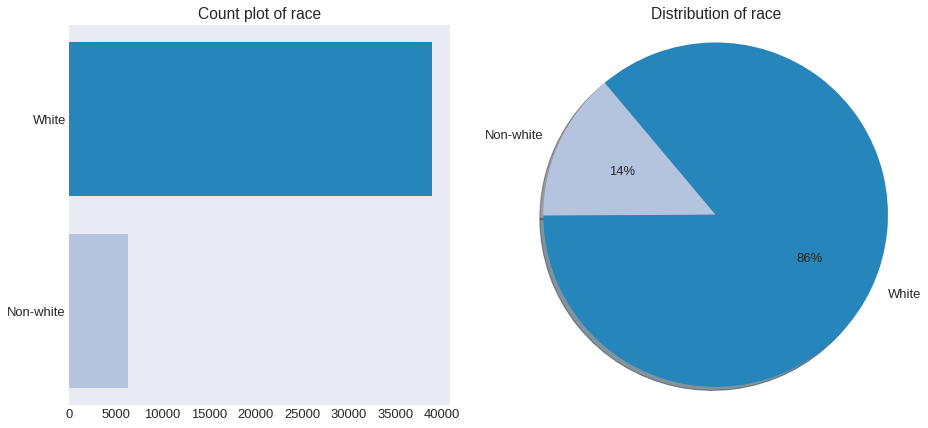

In [ ]:
var = 'race'
target_distribution(y_var=var, data=X)

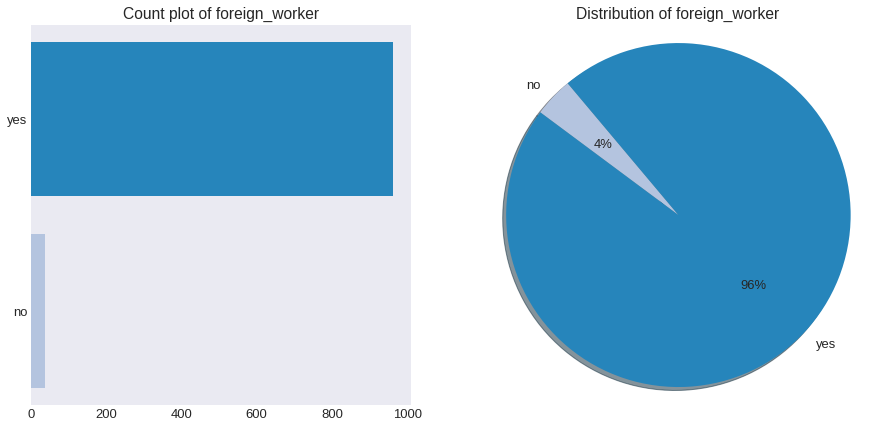

In [ ]:
var = 'foreign_worker'
target_distribution(y_var=var, data=X_)

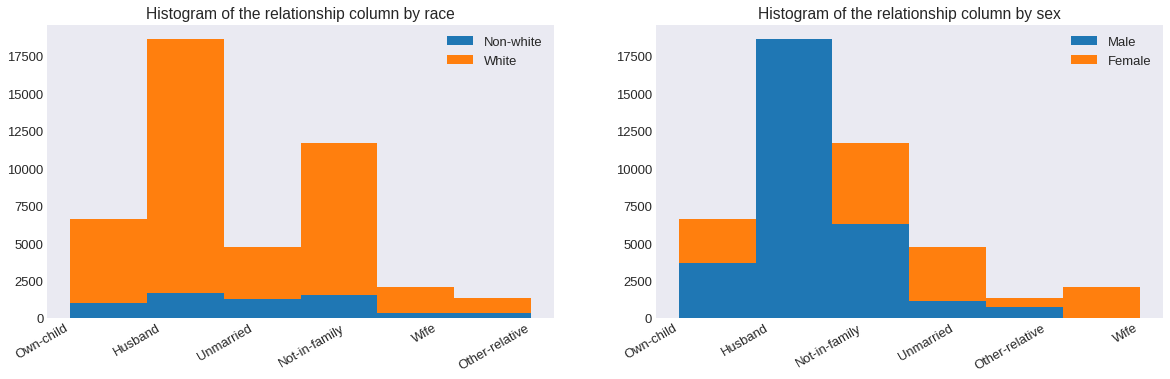

In [ ]:
Y_columns = ['race', 'sex', 'age']
plot_histo(data=X, col='relationship',Y_columns=Y_columns)

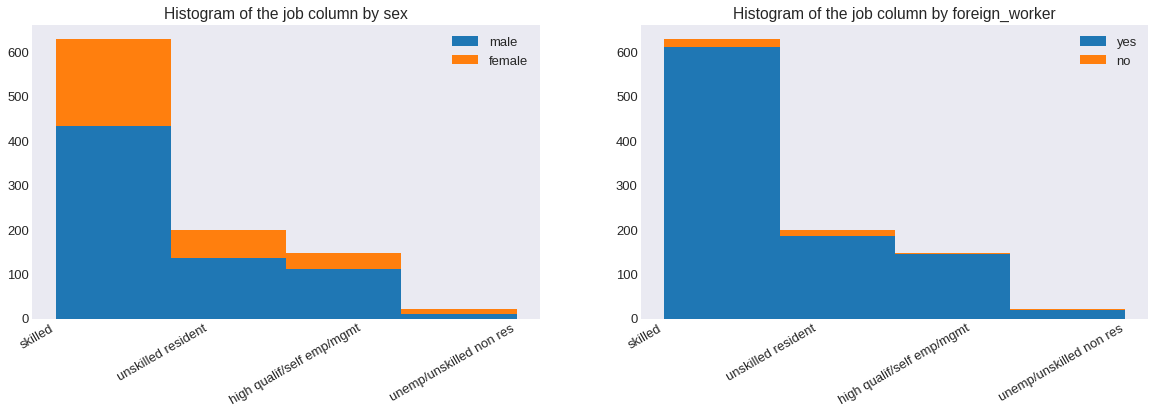

In [ ]:
Y_columns = ['sex', 'foreign_worker', 'age']
plot_histo(data=X_, col='job',Y_columns=Y_columns)

In [ ]:
def get_model_performance(X_test, y_true, y_pred, probs):
    #reference:https://www.kaggle.com/code/nathanlauga/ethics-and-ai-how-to-prevent-bias-on-ml/notebook
    accuracy = accuracy_score(y_true, y_pred)
    matrix = confusion_matrix(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_true, preds)
    roc_auc = auc(fpr, tpr)

    return accuracy, matrix, f1, fpr, tpr, roc_auc

def plot_model_performance(model, X_test, y_true):
    #reference:https://www.kaggle.com/code/nathanlauga/ethics-and-ai-how-to-prevent-bias-on-ml/notebook
    y_pred = model.predict(X_test)
    probs = model.predict_proba(X_test)
    accuracy, matrix, f1, fpr, tpr, roc_auc = get_model_performance(X_test, y_true, y_pred, probs)

    display(Markdown('#### Accuracy of the model :'))
    print(accuracy)
    display(Markdown('#### F1 score of the model :'))
    print(f1)

    fig = plt.figure(figsize=(15, 6))
    ax = fig.add_subplot(1, 2, 1)
    sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix')

    ax = fig.add_subplot(1, 2, 2)
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic curve')
    plt.legend(loc="lower right")

In [ ]:
from sklearn import tree


privileged_groups = [{'sex':1,'race': 1}]
unprivileged_groups = [{'sex':0,'race': 0}]
dataset_orig = load_preproc_data_adult(['sex','race'])

#dataset_orig_fix = dataset_orig.convert_to_dataframe()[0].drop(['race', 'sex'], axis=1)
#STEP 3: We split between training and test set.
train_, test_ = dataset_orig.split([0.7], shuffle=True)
print("training data size", train_.features.shape)
print("dataset feature names", train_.feature_names)

# Different criterions
criterions = ['gini', 'entropy']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 100, num = 5)]
max_depth.append(None)

#Normalize the dataset, both train and test. This should always be done in any machine learning pipeline!
scale = StandardScaler()

X_train_ = scale.fit_transform(train_.features)#do not read the first two column (sex,race) while fitting to the data
y_train_ = train_.labels.ravel()

X_test_ = scale.transform(test_.features) #do not read the first two column (sex,race) while fitting to the data
y_test_ = test_.labels.ravel()

#STEP 5: Mitigate the bias, e.g. by transforming the original dataset via reweighing.
di = DisparateImpactRemover(sensitive_attribute='sex',repair_level = 0.85)
#We obtain a set of weights for the training set, to use in scikit-learn.
trainining_ = di.fit_transform(train_)

learner = DecisionTreeClassifier(criterion='entropy',max_depth=3)  
learner.fit(X_train_,y_train_,sample_weight=trainining_.instance_weights)
predictions = learner.predict(X_test_)
model_acc = sum(predictions==y_test_)/len(y_test_)

test_pred = test_.copy()
test_pred.labels = predictions

classified_metric = ClassificationMetric(test_, test_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)

#retrieving metrics from the classifier. The accuracies include percentage of true pred, statistical parity difference, disparate impact and equal opportunity.
result = {'Accuracy_pre':model_acc,'Accuracy_post':classified_metric.accuracy(),'statistical_parity_difference': classified_metric.statistical_parity_difference(),
      'disparate_impact': classified_metric.disparate_impact(),'equal_opportunity_difference': classified_metric.equal_opportunity_difference()}

results_[str(fold_num)+'DecisionTree_'+str(criterion_1)+str(depth)]=result#saving the results of the decision tree classifier 

training data size (34189, 18)
dataset feature names ['race', 'sex', 'Age (decade)=10', 'Age (decade)=20', 'Age (decade)=30', 'Age (decade)=40', 'Age (decade)=50', 'Age (decade)=60', 'Age (decade)=>=70', 'Education Years=6', 'Education Years=7', 'Education Years=8', 'Education Years=9', 'Education Years=10', 'Education Years=11', 'Education Years=12', 'Education Years=<6', 'Education Years=>12']


#### Accuracy of the model :

0.9484747150754111


#### F1 score of the model :

0.851055434997041


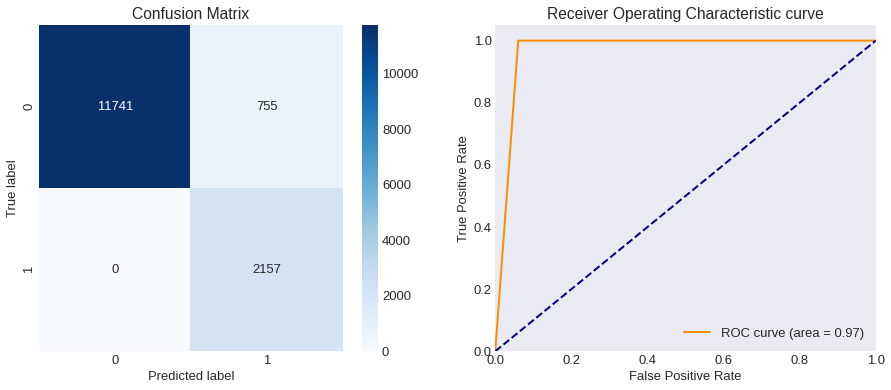

In [ ]:
plot_model_performance(learner, test_.features, test_pred.labels)

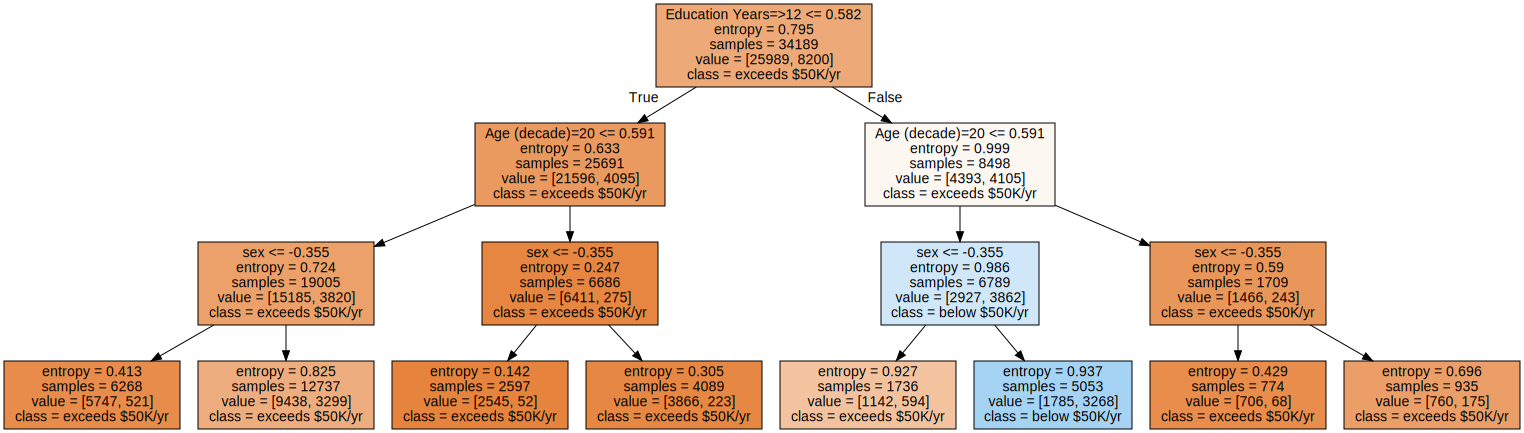

In [ ]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(learner, out_file=None, 
                                feature_names=train_.feature_names,  
                                class_names=['exceeds $50K/yr','below $50K/yr'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [ ]:
from sklearn import tree


privileged_groups = [{'sex':1,'age': 1}]
unprivileged_groups = [{'sex':0,'age': 0}]
dataset_orig = load_preproc_data_german(['sex','age'])

#dataset_orig_fix = dataset_orig.convert_to_dataframe()[0].drop(['race', 'sex'], axis=1)
#STEP 3: We split between training and test set.
train_, test_ = dataset_orig.split([0.8], shuffle=True)
print("training data size", train_.features.shape)
print("dataset feature names", train_.feature_names)

# Different criterions
criterions = ['gini', 'entropy']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 100, num = 5)]
max_depth.append(None)

#Normalize the dataset, both train and test. This should always be done in any machine learning pipeline!
scale = StandardScaler()

X_train_ = scale.fit_transform(train_.features)#do not read the first two column (sex,race) while fitting to the data
y_train_ = train_.labels.ravel()

X_test_ = scale.transform(test_.features) #do not read the first two column (sex,race) while fitting to the data
y_test_ = test_.labels.ravel()

#STEP 5: Mitigate the bias, e.g. by transforming the original dataset via reweighing.
di = DisparateImpactRemover(sensitive_attribute='age',repair_level = 0.85)
#We obtain a set of weights for the training set, to use in scikit-learn.
trainining_ = di.fit_transform(train_)

learner = DecisionTreeClassifier(criterion='entropy',max_depth=3)  
learner.fit(X_train_,y_train_,sample_weight=trainining_.instance_weights)
predictions = learner.predict(X_test_)
model_acc = sum(predictions==y_test_)/len(y_test_)

test_pred = test_.copy()
test_pred.labels = predictions

classified_metric = ClassificationMetric(test_, test_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)

#retrieving metrics from the classifier. The accuracies include percentage of true pred, statistical parity difference, disparate impact and equal opportunity.
result = {'Accuracy_pre':model_acc,'Accuracy_post':classified_metric.accuracy(),'statistical_parity_difference': classified_metric.statistical_parity_difference(),
      'disparate_impact': classified_metric.disparate_impact(),'equal_opportunity_difference': classified_metric.equal_opportunity_difference()}

results_[str(fold_num)+'DecisionTree_'+str(criterion_1)+str(depth)]=result#saving the results of the decision tree classifier 

training data size (800, 11)
dataset feature names ['age', 'sex', 'credit_history=Delay', 'credit_history=None/Paid', 'credit_history=Other', 'savings=500+', 'savings=<500', 'savings=Unknown/None', 'employment=1-4 years', 'employment=4+ years', 'employment=Unemployed']


In [ ]:
test_pred_ = test_pred.labels.copy() - 1 #on the german dataset we have 2 and 1 so subtract by 1

#### Accuracy of the model :

0.095


#### F1 score of the model :

0.17351598173515984


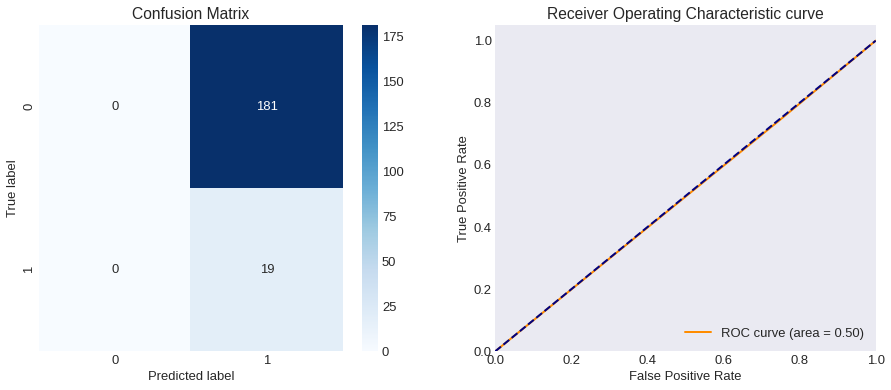

In [ ]:
plot_model_performance(learner, test_.features, test_pred_)

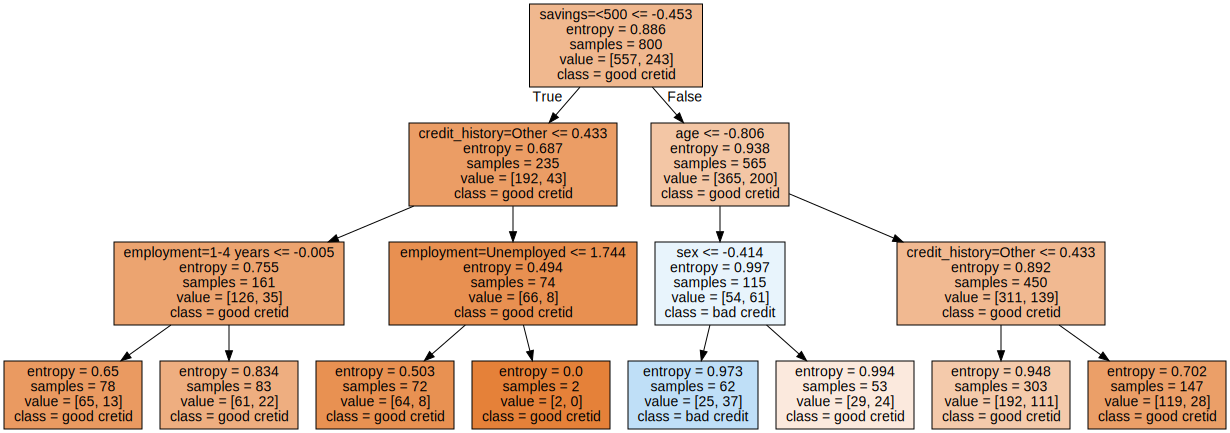

In [ ]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(learner, out_file=None, 
                                feature_names=train_.feature_names,  
                                class_names=['good cretid','bad credit'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph


In [ ]:
def avenger_dictionary(dict_): 
  Accmean_1 = sum(col['Accuracy_pre'] for col in dict_)/ len(dict_)
  Accmean_2 = sum(col['Accuracy_post'] for col in dict_)/ len(dict_)
  Statmean = sum(col['statistical_parity_difference'] for col in dict_)/ len(dict_)
  Dispmean = sum(col['disparate_impact'] for col in dict_)/ len(dict_)
  Equalmean = sum(col['equal_opportunity_difference'] for col in dict_)/ len(dict_)
  keys = ['Accuracy pre','Accuracy post','statistical_parity_difference', 'disparate_impact','equal_opportunity_difference']
  values = [Accmean_1,Accmean_2, Statmean, Dispmean,Equalmean]

  dictionary = dict(zip(keys, values))
  return dictionary

def avenger_dictionary_(dict_): 
  '''
  use for addversarial debiasing and certain trees
  '''
  Accmean_1 = sum(col['Accuracy'] for col in dict_)/ len(dict_)

  Statmean = sum(col['statistical_parity_difference'] for col in dict_)/ len(dict_)
  Dispmean = sum(col['disparate_impact'] for col in dict_)/ len(dict_)
  Equalmean = sum(col['equal_opportunity_difference'] for col in dict_)/ len(dict_)
  keys = ['Accuracy ','statistical_parity_difference', 'disparate_impact','equal_opportunity_difference']
  values = [Accmean_1, Statmean, Dispmean,Equalmean]

  dictionary = dict(zip(keys, values))
  return dictionary

def avenger_dictionary_1(dict_): 
  '''
  use for trees
  '''
  Accmean_1 = sum(col['Accuracy_pre'] for col in dict_)/ len(dict_)

  Statmean = sum(col['statistical_parity_difference'] for col in dict_)/ len(dict_)
  Dispmean = sum(col['disparate_impact'] for col in dict_)/ len(dict_)
  Equalmean = sum(col['equal_opportunity_difference'] for col in dict_)/ len(dict_)
  keys = ['Accuracy ','statistical_parity_difference', 'disparate_impact','equal_opportunity_difference']
  values = [Accmean_1, Statmean, Dispmean,Equalmean]

  dictionary = dict(zip(keys, values))
  return dictionary

def retrive_metrics_dataframe_garry(results_dict):
  '''
  This function uses the results_dict dictionary retrived from the task1_vanilla_test function
  and returns a dataframe with each metrics with the assistance of the avenger_dictionary function
  '''
  results_1_entropy = []

  results_2_entropy =  []

  results_3_entropy =  []

  results_4_entropy = []

  results_5_entropy = []

  for key in results_dict.keys():

    if key[1:]=='GerryFairClassifier_1e-05':
      results_1_entropy.append(results_dict[key])

    if key[1:]=='GerryFairClassifier_0.001':
      results_2_entropy.append(results_dict[key])

    if key[1:]=='GerryFairClassifier_1':
      results_3_entropy.append(results_dict[key])

    if key[1:]=='GerryFairClassifier_100':
      results_4_entropy.append(results_dict[key])

    if key[1:]=='GerryFairClassifier_10000':
      results_5_entropy.append(results_dict[key])

  results_dataframe = {}
  results_dataframe['GerryFairClassifier_1e-05'] = avenger_dictionary(results_1_entropy)
  results_dataframe['GerryFairClassifier_0.001'] = avenger_dictionary(results_2_entropy)
  results_dataframe['GerryFairClassifier_1'] = avenger_dictionary(results_3_entropy)
  results_dataframe['GerryFairClassifier_100'] = avenger_dictionary(results_4_entropy)
  results_dataframe['GerryFairClassifier_10000'] = avenger_dictionary(results_5_entropy)
  df_ = []
  df_ = pd.DataFrame(results_dataframe).T

  return df_

def retrive_metrics_dataframe(results_dict):
  '''
  This function uses the results_dict dictionary retrived from the task1_vanilla_test function
  and returns a dataframe with each metrics with the assistance of the avenger_dictionary function
  '''
  results_1_entropy = []

  results_2_entropy =  []

  results_3_entropy =  []

  results_4_entropy = []

  results_5_entropy = []

  for key in results_dict.keys():

    if key[1:]=='GerryFairClassifier_1e-05':
      results_1_entropy.append(results_dict[key])

    if key[1:]=='GerryFairClassifier_0.001':
      results_2_entropy.append(results_dict[key])

    if key[1:]=='GerryFairClassifier_1':
      results_3_entropy.append(results_dict[key])

    if key[1:]=='GerryFairClassifier_100':
      results_4_entropy.append(results_dict[key])

    if key[1:]=='GerryFairClassifier_10000':
      results_5_entropy.append(results_dict[key])

  results_dataframe = {}
  results_dataframe['GerryFairClassifier_1e-05'] = avenger_dictionary_(results_1_entropy)
  results_dataframe['GerryFairClassifier_0.001'] = avenger_dictionary_(results_2_entropy)
  results_dataframe['GerryFairClassifier_1'] = avenger_dictionary(results_3_entropy)
  results_dataframe['GerryFairClassifier_100'] = avenger_dictionary(results_4_entropy)
  results_dataframe['GerryFairClassifier_10000'] = avenger_dictionary(results_5_entropy)
  df_ = []
  df_ = pd.DataFrame(results_dataframe).T

  return df_

def retrive_metrics_dataframe_addver(results_dict):
  '''
  This function uses the results_dict dictionary retrived from the task1_vanilla_test function
  and returns a dataframe with each metrics with the assistance of the avenger_dictionary function
  '''
  results_1_entropy = []

  results_2_entropy =  []

  results_3_entropy =  []

  results_4_entropy = []

  results_5_entropy = []

  for key in results_dict.keys():

    if key[1:]=='AdversarialDebiasing_1e-05':
      results_1_entropy.append(results_dict[key])

    if key[1:]=='AdversarialDebiasing_0.001':
      results_2_entropy.append(results_dict[key])

    if key[1:]=='AdversarialDebiasing_1':
      results_3_entropy.append(results_dict[key])

    if key[1:]=='AdversarialDebiasing_100':
      results_4_entropy.append(results_dict[key])

    if key[1:]=='AdversarialDebiasing_10000':
      results_5_entropy.append(results_dict[key])

  results_dataframe = {}
  results_dataframe['AdversarialDebiasing_1e-05'] = avenger_dictionary_(results_1_entropy)
  results_dataframe['AdversarialDebiasing_0.001'] = avenger_dictionary_(results_2_entropy)
  results_dataframe['AdversarialDebiasing_1'] = avenger_dictionary_(results_3_entropy)
  results_dataframe['AdversarialDebiasing_100'] = avenger_dictionary_(results_4_entropy)
  results_dataframe['AdversarialDebiasing_10000'] = avenger_dictionary_(results_5_entropy)
  df_ = []
  df_ = pd.DataFrame(results_dataframe).T

  return df_

def retrive_metrics_dataframeTrees(results_dict):
  '''
  This function uses the results_dict dictionary retrived from the task1_vanilla_test function
  and returns a dataframe with each metrics with the assistance of the avenger_dictionary function
  '''
  results_2_entropy,results_2_gini = [],[]

  results_26_entropy,results_26_gini =  [],[]

  results_51_entropy,results_51_gini =  [],[]

  results_75_entropy,results_75_gini = [],[]

  results_100_entropy,results_100_gini = [],[]

  results_None_entropy,results_None_gini = [],[]

  for key in results_dict.keys():

    if key[1:]=='DecisionTree_entropy2':
      results_2_entropy.append(results_dict[key])
    if key[1:]=='DecisionTree_gini2':
      results_2_gini.append(results_dict[key])

    if key[1:]=='DecisionTree_entropy26':
      results_26_entropy.append(results_dict[key])
    if key[1:]=='DecisionTree_gini26':
      results_26_gini.append(results_dict[key])

    if key[1:]=='DecisionTree_entropy51':
      results_51_entropy.append(results_dict[key])
    if key[1:]=='DecisionTree_gini51':
      results_51_gini.append(results_dict[key])

    if key[1:]=='DecisionTree_entropy100':
      results_100_entropy.append(results_dict[key])
    if key[1:]=='DecisionTree_gini100':
      results_100_gini.append(results_dict[key])

    if key[1:]=='DecisionTree_entropyNone':
      results_None_entropy.append(results_dict[key])
    if key[1:]=='DecisionTree_giniNone':
      results_None_gini.append(results_dict[key])

  results_dataframe = {}
  results_dataframe['DecisionTree_entropy2'] = avenger_dictionary_(results_2_entropy)
  results_dataframe['DecisionTree_gini2'] = avenger_dictionary_(results_2_gini)
  results_dataframe['DecisionTree_entropy26'] = avenger_dictionary_(results_26_entropy)
  results_dataframe['DecisionTree_gini26'] = avenger_dictionary_(results_26_gini)
  results_dataframe['DecisionTree_entropy51'] = avenger_dictionary_(results_51_entropy)
  results_dataframe['DecisionTree_gini51'] = avenger_dictionary_(results_51_gini)
  results_dataframe['DecisionTree_entropy100'] = avenger_dictionary_(results_100_entropy)
  results_dataframe['DecisionTree_gini100'] = avenger_dictionary_(results_100_gini)
  results_dataframe['DecisionTree_entropyNone'] = avenger_dictionary_(results_None_entropy)
  results_dataframe['DecisionTree_giniNone'] = avenger_dictionary_(results_None_gini)
  df_ = []
  df_ = pd.DataFrame(results_dataframe).T

  return df_

def retrive_metrics_dataframeTrees_1(results_dict):
  '''
  This function uses the results_dict dictionary retrived from the task1_vanilla_test function
  and returns a dataframe with each metrics with the assistance of the avenger_dictionary function
  '''
  results_2_entropy,results_2_gini = [],[]

  results_26_entropy,results_26_gini =  [],[]

  results_51_entropy,results_51_gini =  [],[]

  results_75_entropy,results_75_gini = [],[]

  results_100_entropy,results_100_gini = [],[]

  results_None_entropy,results_None_gini = [],[]

  for key in results_dict.keys():

    if key[1:]=='DecisionTree_entropy2':
      results_2_entropy.append(results_dict[key])
    if key[1:]=='DecisionTree_gini2':
      results_2_gini.append(results_dict[key])

    if key[1:]=='DecisionTree_entropy26':
      results_26_entropy.append(results_dict[key])
    if key[1:]=='DecisionTree_gini26':
      results_26_gini.append(results_dict[key])

    if key[1:]=='DecisionTree_entropy51':
      results_51_entropy.append(results_dict[key])
    if key[1:]=='DecisionTree_gini51':
      results_51_gini.append(results_dict[key])

    if key[1:]=='DecisionTree_entropy100':
      results_100_entropy.append(results_dict[key])
    if key[1:]=='DecisionTree_gini100':
      results_100_gini.append(results_dict[key])

    if key[1:]=='DecisionTree_entropyNone':
      results_None_entropy.append(results_dict[key])
    if key[1:]=='DecisionTree_giniNone':
      results_None_gini.append(results_dict[key])

  results_dataframe = {}
  results_dataframe['DecisionTree_entropy2'] = avenger_dictionary_1(results_2_entropy)
  results_dataframe['DecisionTree_gini2'] = avenger_dictionary_1(results_2_gini)
  results_dataframe['DecisionTree_entropy26'] = avenger_dictionary_1(results_26_entropy)
  results_dataframe['DecisionTree_gini26'] = avenger_dictionary_1(results_26_gini)
  results_dataframe['DecisionTree_entropy51'] = avenger_dictionary_1(results_51_entropy)
  results_dataframe['DecisionTree_gini51'] = avenger_dictionary_1(results_51_gini)
  results_dataframe['DecisionTree_entropy100'] = avenger_dictionary_1(results_100_entropy)
  results_dataframe['DecisionTree_gini100'] = avenger_dictionary_1(results_100_gini)
  results_dataframe['DecisionTree_entropyNone'] = avenger_dictionary_1(results_None_entropy)
  results_dataframe['DecisionTree_giniNone'] = avenger_dictionary_1(results_None_gini)
  df_ = []
  df_ = pd.DataFrame(results_dataframe).T

  return df_


def retrive_metrics_dataframe_tree_repair(results_dict):
  '''
  This function uses the results_dict dictionary retrived from the task1_vanilla_test function
  and returns a dataframe with each metrics with the assistance of the avenger_dictionary function
  '''
  results_1_entropy = []

  results_2_entropy =  []

  results_3_entropy =  []

  results_4_entropy = []

  results_5_entropy = []

  for key in results_dict.keys():

    if key[1:]=='DecisionTree_0.1':
      results_1_entropy.append(results_dict[key])

    if key[1:]=='DecisionTree_0.3':
      results_2_entropy.append(results_dict[key])

    if key[1:]=='DecisionTree_0.5':
      results_3_entropy.append(results_dict[key])

    if key[1:]=='DecisionTree_0.7':
      results_4_entropy.append(results_dict[key])

    if key[1:]=='DecisionTree_1':
      results_5_entropy.append(results_dict[key])

  results_dataframe = {}
  results_dataframe['DecisionTree_0.1'] = avenger_dictionary(results_1_entropy)
  results_dataframe['DecisionTree_0.3'] = avenger_dictionary(results_2_entropy)
  results_dataframe['DecisionTree_0.5'] = avenger_dictionary(results_3_entropy)
  results_dataframe['DecisionTree_0.1'] = avenger_dictionary(results_4_entropy)
  results_dataframe['DecisionTree_1'] = avenger_dictionary(results_5_entropy)
  df_ = []
  df_ = pd.DataFrame(results_dataframe).T

  return df_

In [ ]:
!ls '/content/drive/MyDrive/UniSussex/ML/'

AdversarialDebiasing_job_.pickle
AdversarialDebiasing_relationshipfeature_.pickle
DecisionTree_jobfeature_weighted_.pickle
DecisionTree_nosensitivefeatureAdult_.pickle
DecisionTree_nosensitivefeature_postprocessingGerman_.pickle
DecisionTree_relationshipfeature_weighted_.pickle
results_occupation_Tree_Extra_postprocessing_GerryFair_.pickle
results_occupation_Tree_Extra_prepostprocessing.pickle
SplitsExtra_AdversarialDebiasingClassifier_adult_.pickle
SplitsExtra_GerryFairClassifier_adult_.pickle
Submit_ML_Coursework_Final_Part2_final.ipynb
Submit_ML_Coursework_Final_Part2.ipynb


In [ ]:
import pickle
file = open("/content/drive/MyDrive/UniSussex/ML/AdversarialDebiasing_job_.pickle",'rb')
object_file = pickle.load(file)
file.close()
df_deb = retrive_metrics_dataframe_addver(object_file)
df_deb

,Accuracy,statistical_parity_difference,disparate_impact,equal_opportunity_difference
AdversarialDebiasing_1e-05,0.692,0.003251,1.005316,0.013857
AdversarialDebiasing_0.001,0.577,0.020737,1.173595,0.022503
AdversarialDebiasing_1,0.638,0.011106,1.046815,0.012588
AdversarialDebiasing_100,0.527,-0.003188,0.596282,-0.013271
AdversarialDebiasing_10000,0.300,0.000000,0.000000,0.000000


In [ ]:
file = open("/content/drive/MyDrive/UniSussex/ML/AdversarialDebiasing_relationshipfeature_.pickle",'rb')
object_file = pickle.load(file)
file.close()
df_deb = retrive_metrics_dataframe_addver(object_file)
df_deb

,Accuracy,statistical_parity_difference,disparate_impact,equal_opportunity_difference
AdversarialDebiasing_1e-05,0.826589,0.083379,1.906274,-0.041674
AdversarialDebiasing_0.001,0.823626,0.070651,1.796369,-0.069492
AdversarialDebiasing_1,0.784530,-0.014572,0.891330,-0.308977
AdversarialDebiasing_100,0.741254,0.000499,0.455607,-0.056658
AdversarialDebiasing_10000,0.752156,0.000000,0.000000,0.000000


In [ ]:
file = open("/content/drive/MyDrive/UniSussex/ML/DecisionTree_jobfeature_weighted_.pickle",'rb')
object_file = pickle.load(file)
file.close()
df_tree = retrive_metrics_dataframeTrees(object_file)
df_tree

,Accuracy,statistical_parity_difference,disparate_impact,equal_opportunity_difference
DecisionTree_entropy2,0.695,0.008627,1.009525,0.003497
DecisionTree_gini2,0.704,0.011333,1.013396,0.020259
DecisionTree_entropy26,0.671,-0.022072,0.969025,-0.058900
DecisionTree_gini26,0.677,-0.025540,0.964512,-0.070042
DecisionTree_entropy51,0.669,-0.007307,0.990641,-0.039502
DecisionTree_gini51,0.685,-0.007901,0.993023,-0.044106
DecisionTree_entropy100,0.671,-0.011405,0.984019,-0.037145
DecisionTree_gini100,0.681,-0.028952,0.960204,-0.047667
DecisionTree_entropyNone,0.670,-0.014184,0.980365,-0.037811
DecisionTree_giniNone,0.672,-0.018880,0.976012,-0.051399


In [ ]:
file = open("/content/drive/MyDrive/UniSussex/ML/DecisionTree_nosensitivefeatureAdult_.pickle",'rb')
object_file = pickle.load(file)
file.close()
df_tree = retrive_metrics_dataframeTrees_1(object_file)
df_tree

,Accuracy,statistical_parity_difference,disparate_impact,equal_opportunity_difference
DecisionTree_entropy2,0.786803,-0.108048,0.525767,-0.008338
DecisionTree_gini2,0.786803,-0.108048,0.525767,-0.008338
DecisionTree_entropy26,0.786393,-0.095991,0.533800,0.012991
DecisionTree_gini26,0.786393,-0.095991,0.533800,0.012991
DecisionTree_entropy51,0.786393,-0.095991,0.533800,0.012991
DecisionTree_gini51,0.786393,-0.095991,0.533800,0.012991
DecisionTree_entropy100,0.786393,-0.095991,0.533800,0.012991
DecisionTree_gini100,0.786393,-0.095991,0.533800,0.012991
DecisionTree_entropyNone,0.786393,-0.095991,0.533800,0.012991
DecisionTree_giniNone,0.786393,-0.095991,0.533800,0.012991


In [ ]:
file = open("/content/drive/MyDrive/UniSussex/ML/DecisionTree_relationshipfeature_weighted_.pickle",'rb')
object_file = pickle.load(file)
file.close()
df_tree = retrive_metrics_dataframeTrees(object_file)
df_tree

,Accuracy,statistical_parity_difference,disparate_impact,equal_opportunity_difference
DecisionTree_entropy2,0.794370,0.020106,1.711175,-0.106171
DecisionTree_gini2,0.795564,0.022562,1.728922,-0.094952
DecisionTree_entropy26,0.819070,0.092818,1.745245,-0.001946
DecisionTree_gini26,0.817235,0.103432,1.824582,0.027051
DecisionTree_entropy51,0.811729,0.146129,2.173655,0.087468
DecisionTree_gini51,0.811397,0.147548,2.196868,0.096776
DecisionTree_entropy100,0.813387,0.149752,2.224871,0.086096
DecisionTree_gini100,0.811309,0.148620,2.220757,0.101884
DecisionTree_entropyNone,0.811972,0.146512,2.164470,0.083092
DecisionTree_giniNone,0.811198,0.147584,2.196917,0.098136


In [ ]:
file = open("/content/drive/MyDrive/UniSussex/ML/results_occupation_Tree_Extra_postprocessing_GerryFair_.pickle",'rb')
object_file = pickle.load(file)
file.close()
df_garry = retrive_metrics_dataframe(object_file)
df_garry

,Accuracy pre,Accuracy post,statistical_parity_difference,disparate_impact,equal_opportunity_difference
GerryFairClassifier_1e-05,0.802627,0.624938,-0.001496,0.997007,0.013848
GerryFairClassifier_0.001,0.802627,0.624938,-0.001496,0.997007,0.013848
GerryFairClassifier_1,0.717190,0.731551,-0.061032,0.823054,0.019144
GerryFairClassifier_100,0.240019,0.622481,0.001446,1.002892,0.034528
GerryFairClassifier_10000,0.240019,0.622481,0.001446,1.002892,0.034528


In [ ]:
file = open("/content/drive/MyDrive/UniSussex/ML/results_occupation_Tree_Extra_prepostprocessing.pickle",'rb')
object_file = pickle.load(file)
file.close()
df_garry =  retrive_metrics_dataframe_tree_repair(object_file)
df_garry

,Accuracy pre,Accuracy post,statistical_parity_difference,disparate_impact,equal_opportunity_difference
DecisionTree_0.1,0.804586,0.622803,-0.000572,0.998856,0.028104
DecisionTree_0.3,0.804586,0.622803,-0.000572,0.998856,0.028104
DecisionTree_0.5,0.804586,0.622803,-0.000572,0.998856,0.028104
DecisionTree_1,0.804586,0.622803,-0.000572,0.998856,0.028104


In [ ]:
def retrive_metrics_dataframe_addver_(results_dict):
  '''
  This function uses the results_dict dictionary retrived from the task1_vanilla_test function
  and returns a dataframe with each metrics with the assistance of the avenger_dictionary function
  '''
  results_1_entropy = []

  results_2_entropy =  []

  results_3_entropy =  []

  results_4_entropy = []

  results_5_entropy = []

  for key in results_dict.keys():

    if key[1:]=='AdversarialDebiasing_1e-05':
      results_1_entropy.append(results_dict[key])

    if key[1:]=='AdversarialDebiasing_0.001':
      results_2_entropy.append(results_dict[key])

    if key[1:]=='AdversarialDebiasing_1':
      results_3_entropy.append(results_dict[key])

    if key[1:]=='AdversarialDebiasing_100':
      results_4_entropy.append(results_dict[key])

    if key[1:]=='AdversarialDebiasing_10000':
      results_5_entropy.append(results_dict[key])

  results_dataframe = {}
  results_dataframe['AdversarialDebiasing_1e-05'] = avenger_dictionary(results_1_entropy)
  results_dataframe['AdversarialDebiasing_0.001'] = avenger_dictionary(results_2_entropy)
  results_dataframe['AdversarialDebiasing_1'] = avenger_dictionary(results_3_entropy)
  results_dataframe['AdversarialDebiasing_100'] = avenger_dictionary(results_4_entropy)
  results_dataframe['AdversarialDebiasing_10000'] = avenger_dictionary(results_5_entropy)
  df_ = []
  df_ = pd.DataFrame(results_dataframe).T

  return df_


def retrive_metrics_dataframe_garr_(results_dict):
  '''
  This function uses the results_dict dictionary retrived from the task1_vanilla_test function
  and returns a dataframe with each metrics with the assistance of the avenger_dictionary function
  '''
  results_1_entropy = []

  results_2_entropy =  []

  results_3_entropy =  []

  results_4_entropy = []

  results_5_entropy = []

  for key in results_dict.keys():
 
    if key[1:]=='GerryFairClassifier_1e-05':
      results_1_entropy.append(results_dict[key])

    if key[1:]=='GerryFairClassifier_0.001':
      results_2_entropy.append(results_dict[key])

    if key[1:]=='GerryFairClassifier_1':
      results_3_entropy.append(results_dict[key])

    if key[1:]=='GerryFairClassifier_100':
      results_4_entropy.append(results_dict[key])

    if key[1:]=='GerryFairClassifier_10000':
      results_5_entropy.append(results_dict[key])

  results_dataframe = {}
  results_dataframe['GerryFairClassifier_1e-05'] = avenger_dictionary(results_1_entropy)
  results_dataframe['GerryFairClassifier_0.001'] = avenger_dictionary(results_2_entropy)
  results_dataframe['GerryFairClassifier_1'] = avenger_dictionary(results_3_entropy)
  results_dataframe['GerryFairClassifier_100'] = avenger_dictionary(results_4_entropy)
  results_dataframe['GerryFairClassifier_10000'] = avenger_dictionary(results_5_entropy)
  df_ = []
  df_ = pd.DataFrame(results_dataframe).T

  return df_

In [ ]:
file = open("/content/drive/MyDrive/UniSussex/ML/SplitsExtra_AdversarialDebiasingClassifier_adult_.pickle",'rb')
object_file = pickle.load(file)
file.close()
#retriving the avarage of each split
diccit_1 = {}
diccit_2 = {}
diccit_3 = {}
diccit_4 = {}
diccit_5 = {}

for key in object_file:
  df_garry =  retrive_metrics_dataframe_addver_(object_file[key])
  diccit_1[key] = [df_garry.loc['AdversarialDebiasing_1e-05'][0],df_garry.loc['AdversarialDebiasing_1e-05'][4]]
  diccit_2[key] = [df_garry.loc['AdversarialDebiasing_0.001'][0],df_garry.loc['AdversarialDebiasing_0.001'][4]]
  diccit_3[key] = [df_garry.loc['AdversarialDebiasing_1'][0],df_garry.loc['AdversarialDebiasing_1'][4]]
  diccit_4[key] = [df_garry.loc['AdversarialDebiasing_100'][0],df_garry.loc['AdversarialDebiasing_100'][4]]
  diccit_5[key] = [df_garry.loc['AdversarialDebiasing_10000'][0],df_garry.loc['AdversarialDebiasing_10000'][4]]



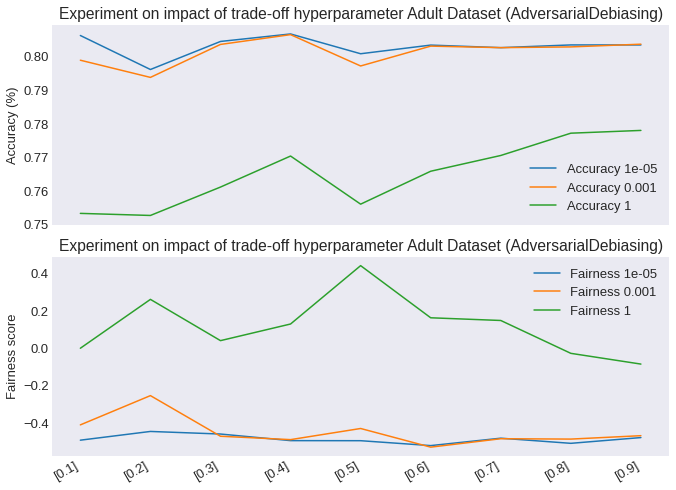

In [ ]:

df_1 = pd.DataFrame(diccit_1).T
df_1.columns = ['Accuracy', 'equal_opportunity_difference']

df_2 = pd.DataFrame(diccit_2).T
df_2.columns = ['Accuracy', 'equal_opportunity_difference']

df_3 = pd.DataFrame(diccit_3).T
df_3.columns = ['Accuracy', 'equal_opportunity_difference']

df_4 = pd.DataFrame(diccit_4).T
df_4.columns = ['Accuracy', 'equal_opportunity_difference']

df_5 = pd.DataFrame(diccit_5).T
df_5.columns = ['Accuracy', 'equal_opportunity_difference']

#fig = plt.figure(figsize=(10,5))

fig, ax = plt.subplots(2, 1,figsize=(10,7))

ax[0].plot(df_1['Accuracy'],label='Accuracy 1e-05') #row=0, col=0
ax[0].plot(df_2['Accuracy'],label='Accuracy 0.001') #row=0, col=0
ax[0].plot(df_3['Accuracy'],label='Accuracy 1') #row=0, col=0
#ax[0].plot(df_4['Accuracy'],label='Accuracy 100') #row=0, col=0
#ax[0].plot(df_5['Accuracy'],label='Accuracy 10000') #row=0, col=0

ax[1].plot(df_1['equal_opportunity_difference'],label='Fairness 1e-05') #row=0, col=0
ax[1].plot(df_2['equal_opportunity_difference'],label='Fairness 0.001') #row=0, col=0
ax[1].plot(df_3['equal_opportunity_difference'],label='Fairness 1') #row=0, col=0
#ax[1].plot(df_4['equal_opportunity_difference'],label='Fairness 100') #row=0, col=0
#ax[1].plot(df_5['equal_opportunity_difference'],label='Fairness 10000') #row=0, col=0


ax[0].set(ylabel="Accuracy (%)",title="Experiment on impact of trade-off hyperparameter Adult Dataset (AdversarialDebiasing)")
ax[1].set(ylabel="Fairness score",title="Experiment on impact of trade-off hyperparameter Adult Dataset (AdversarialDebiasing)")

#reference:https://stackabuse.com/rotate-axis-labels-in-matplotlib/
fig.autofmt_xdate()#Rotate ticks to Fit in Matplotlib
fig.tight_layout()
ax[0].legend()
ax[1].legend()
plt.show()

In [ ]:
file = open("/content/drive/MyDrive/UniSussex/ML/SplitsExtra_GerryFairClassifier_adult_.pickle",'rb')
object_file = pickle.load(file)
file.close()

#retriving the avarage of each split
diccit_1 = {}
diccit_2 = {}
diccit_3 = {}
diccit_4 = {}
diccit_5 = {}

for key in object_file:
  df_garry =  retrive_metrics_dataframe_garr_(object_file[key])
  diccit_1[key] = [df_garry.loc['GerryFairClassifier_1e-05'][0],df_garry.loc['GerryFairClassifier_1e-05'][4]]
  diccit_2[key] = [df_garry.loc['GerryFairClassifier_0.001'][0],df_garry.loc['GerryFairClassifier_0.001'][4]]
  diccit_3[key] = [df_garry.loc['GerryFairClassifier_1'][0],df_garry.loc['GerryFairClassifier_1'][4]]
  diccit_4[key] = [df_garry.loc['GerryFairClassifier_100'][0],df_garry.loc['GerryFairClassifier_100'][4]]
  diccit_5[key] = [df_garry.loc['GerryFairClassifier_10000'][0],df_garry.loc['GerryFairClassifier_10000'][4]]

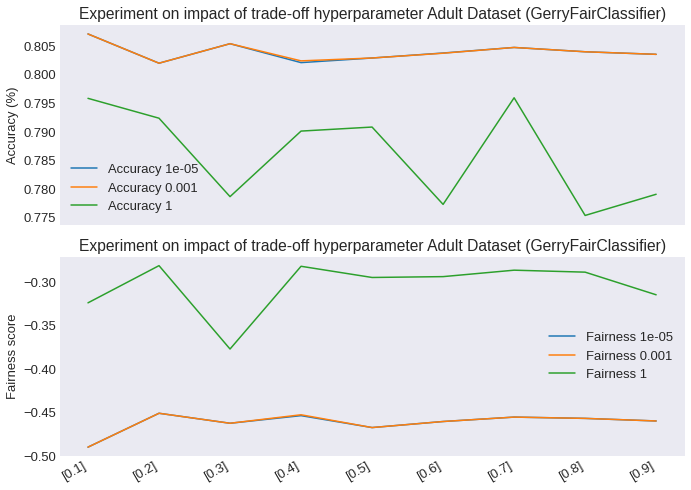

In [ ]:

df_1 = pd.DataFrame(diccit_1).T
df_1.columns = ['Accuracy', 'equal_opportunity_difference']

df_2 = pd.DataFrame(diccit_2).T
df_2.columns = ['Accuracy', 'equal_opportunity_difference']

df_3 = pd.DataFrame(diccit_3).T
df_3.columns = ['Accuracy', 'equal_opportunity_difference']

df_4 = pd.DataFrame(diccit_4).T
df_4.columns = ['Accuracy', 'equal_opportunity_difference']

df_5 = pd.DataFrame(diccit_5).T
df_5.columns = ['Accuracy', 'equal_opportunity_difference']

#fig = plt.figure(figsize=(10,5))

fig, ax = plt.subplots(2, 1,figsize=(10,7))

ax[0].plot(df_1['Accuracy'],label='Accuracy 1e-05') #row=0, col=0
ax[0].plot(df_2['Accuracy'],label='Accuracy 0.001') #row=0, col=0
ax[0].plot(df_3['Accuracy'],label='Accuracy 1') #row=0, col=0
#ax[0].plot(df_4['Accuracy'],label='Accuracy 100') #row=0, col=0
#ax[0].plot(df_5['Accuracy'],label='Accuracy 10000') #row=0, col=0

ax[1].plot(df_1['equal_opportunity_difference'],label='Fairness 1e-05') #row=0, col=0
ax[1].plot(df_2['equal_opportunity_difference'],label='Fairness 0.001') #row=0, col=0
ax[1].plot(df_3['equal_opportunity_difference'],label='Fairness 1') #row=0, col=0
#ax[1].plot(df_4['equal_opportunity_difference'],label='Fairness 100') #row=0, col=0
#ax[1].plot(df_5['equal_opportunity_difference'],label='Fairness 10000') #row=0, col=0


ax[0].set(ylabel="Accuracy (%)",title="Experiment on impact of trade-off hyperparameter Adult Dataset (GerryFairClassifier)")
ax[1].set(ylabel="Fairness score",title="Experiment on impact of trade-off hyperparameter Adult Dataset (GerryFairClassifier)")

#reference:https://stackabuse.com/rotate-axis-labels-in-matplotlib/
fig.autofmt_xdate()#Rotate ticks to Fit in Matplotlib
fig.tight_layout()
ax[0].legend()
ax[1].legend()
plt.show()

In [ ]:
!ls '/content/drive/MyDrive/UniSussex/ML/'


AdversarialDebiasing_job_.pickle
AdversarialDebiasing_relationshipfeature_.pickle
DecisionTree_jobfeature_weighted_.pickle
DecisionTree_nosensitivefeatureAdult_.pickle
DecisionTree_nosensitivefeature_postprocessingGerman_.pickle
DecisionTree_relationshipfeature_weighted_.pickle
results_occupation_Tree_Extra_postprocessing_GerryFair_.pickle
results_occupation_Tree_Extra_prepostprocessing.pickle
SplitsExtra_AdversarialDebiasingClassifier_adult_.pickle
SplitsExtra_GerryFairClassifier_adult_.pickle
Submit_ML_Coursework_Final_Part2_final.ipynb
Submit_ML_Coursework_Final_Part2.ipynb
